___
# PROJETO 1

## Bruno Dratcu
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


UF = unidade de federação 

V0202 = tipo do domicilio (2 = casa, 4 = apartamento, 6 = comodo)
V0205 = numero de comodos do domicilio
V4620 = numero de componentes do domicilio

V0207 = condição de ocupação do domicilio (1=proprio-ja pago, 2=proprio-ainda pagando, 3=alugado, 4=cedido por empregador, 5=cedido de outra forma, 6=outra condição)
V4621 = rendimento mensal domiciliar per capita

V02322 = tem acesso a internet no proprio domicilio (2 = sim, 4 = nao)

V0215 = tem banheiro no domicilio (1=sim, 3=nao)
V2016 = numero de banheiros 
V0217 = forma de escoadouro do banheiro
V0212 = proveniencia da agua canalizada (2=rede de distribuição, 4=poço ou nascente, 6=outros)





___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruno Dratcu\Desktop\2o DP\CD\CD1S17\Projeto1


In [3]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

In [4]:
dados2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,270.0,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,270.0,1150.0,191,110001,1,1.0,1150.0,4.0,1.0,20161104
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,270.0,4760.0,191,110001,1,6.0,793.0,4.0,2.0,20161104
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,271.0,5800.0,191,110001,1,2.0,2900.0,6.0,2.0,20161104


In [5]:
dados = dados2015.loc[:,["UF","V0202", "V0203", "V0204", "V0205",
                          "V0207","V4621","V2015",
                          "V0216"]] #,"V0217","V0212"]]

In [6]:
dados = pd.DataFrame()

dados["Regiões"] = dados2015.UF
dados["Domicílio"] = dados2015.V0202
dados["Material predominante das paredes do domicílio"] = dados2015.V0203
dados["Material predominante na cobertura do domicílio"] = dados2015.V0204
dados["Quantidade de Cômodos"] = dados2015.V0205
dados["Condição de ocupação"] = dados2015.V0207
dados["Rendimento mensal"] = dados2015.V4621
dados["Banheiro/sanitário?"] = dados2015.V0215
dados["Quantidade de banheiros"] = dados2015.V2016


#dados["Forma de escoamento"] = dados2015.V0217
#dados["Proveniência da água canalizada"] = dados2015.V0212

#dados

In [7]:
dados["Regiões"] = dados["Regiões"].astype('category')
dados["Regiões"].cat.categories = ('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
                                   'Amapá', 'Tocantins', 'Maranhão','Piauí', 'Ceará',
                                   'Rio Grande do Norte','Paraíba', 'Pernambuco', 'Alagoas', 
                                   'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 
                                   'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 
                                   'Rio Grande do Sul','Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 
                                   'Distrito Federal')

dados["Domicílio"] = dados["Domicílio"].astype('category')
dados["Domicílio"].cat.categories = ('Casa', 'Apartamento', 'Cômodo')

dados["Material predominante das paredes do domicílio"] = dados["Material predominante das paredes do domicílio"].astype('category')
dados["Material predominante das paredes do domicílio"].cat.categories = ('Alvenaria','Madeira aparelhada','Taipa não revestida',
                                                                          'Madeira aproveitada','Palha','Outro material')

dados["Material predominante na cobertura do domicílio"] = dados["Material predominante na cobertura do domicílio"].astype('category')
dados["Material predominante na cobertura do domicílio"].cat.categories = ('Telha','Laje de concreto','Madeira aparelhada',
                                                                           'Zinco','Madeira aproveitada','Palha','Outro material')

dados["Quantidade de Cômodos"] = dados["Quantidade de Cômodos"].astype('float')

dados["Condição de ocupação"] = dados["Condição de ocupação"].astype('category')
dados["Condição de ocupação"].cat.categories = ('Próprio(pago)', 'Próprio(pagando)', 'Alugado',
                                                'Cedido por empregador', 'Cedido de outra forma',
                                                'Outras condições')

dados["Rendimento mensal"] = dados["Rendimento mensal"].astype('float')

dados["Banheiro/sanitário?"] = dados["Banheiro/sanitário?"].astype('category')
dados["Banheiro/sanitário?"].cat.categories = ('Sim','Não')

dados["Quantidade de banheiros"] = dados["Quantidade de banheiros"].astype('float')

#dados["Forma de escoamento"] = dados["Forma de escoamento"].astype('category')
#dados["Forma de escoamento"].cat.categories = ('Rede de esgoto', 'Fossa séptica ligada a rede coletora', 
#                                               'Fossa séptica não ligada a rede coletora', 'Fossa rudimentar', 'Vala', 
#                                               'Direto para rios/lagos/mar', 'Outra forma')

#dados["Proveniência da água canalizada"] = dados["Proveniência da água canalizada"].astype('category')
#dados["Proveniência da água canalizada"].cat.categories = ('Rede geral de distribuição',
#                                                           'Poço ou nascente', 'Outra proveniência')


In [55]:
#Filtrando renda
dados["Rendimento mensal"] = dados["Rendimento mensal"][dados2015.V4621<=1000000]


#Filtrando regiões
dados["Regiões"] = 'Regiões'
dados.loc[(dados2015['UF']>=11) & (dados2015['UF']<=17), 'Regiões'] = 'Norte'
dados.loc[(dados2015['UF']>=21) & (dados2015['UF']<=29), 'Regiões'] = 'Nordeste'
dados.loc[(dados2015['UF']>=31) & (dados2015['UF']<=35), 'Regiões'] = 'Sudeste'
dados.loc[(dados2015['UF']>=41) & (dados2015['UF']<=43), 'Regiões'] = 'Sul'
dados.loc[(dados2015['UF']>=50) & (dados2015['UF']<=53), 'Regiões'] = 'Centro_Oeste'

dados['Quantidade de Cômodos'] = 'Cômodos'
dados.loc[(dados2015["V0205"]<=10), 'Cômodos'] = "quant_comodos"

In [14]:
#Tirando NaN das colunas -> dados.dropna(subset = ['coluna_1', 'coluna_2'])
dados = dados.dropna()

In [15]:
domicilio_absoluto = dados["Domicílio"].value_counts()
print("Freq absoluta:\n", domicilio_absoluto, '\n')


domicilio_relativo = (dados["Domicílio"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", domicilio_relativo)

Freq absoluta:
 Casa           96694
Apartamento    12676
Cômodo           253
Name: Domicílio, dtype: int64 

Freq relativa:
 Casa           88.2
Apartamento    11.6
Cômodo          0.2
Name: Domicílio, dtype: float64


In [16]:
comodos_absoluto = dados["Quantidade de Cômodos"].value_counts()
print("Freq absoluta:\n", comodos_absoluto, '\n')


comodos_relativo = (dados["Quantidade de Cômodos"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", comodos_relativo)

Freq absoluta:
 comodos    109623
Name: Quantidade de Cômodos, dtype: int64 

Freq relativa:
 comodos    100.0
Name: Quantidade de Cômodos, dtype: float64


In [17]:
ocupacao_absoluto = dados["Condição de ocupação"].value_counts()
print("Freq absoluta:\n", ocupacao_absoluto, '\n')


ocupacao_relativo = (dados["Condição de ocupação"].value_counts(True)*100).round(decimals=1)
print("Freq relativa:\n", ocupacao_relativo)

Freq absoluta:
 Próprio(pago)            76819
Alugado                  20109
Cedido de outra forma     5344
Próprio(pagando)          4993
Cedido por empregador     2073
Outras condições           285
Name: Condição de ocupação, dtype: int64 

Freq relativa:
 Próprio(pago)            70.1
Alugado                  18.3
Cedido de outra forma     4.9
Próprio(pagando)          4.6
Cedido por empregador     1.9
Outras condições          0.3
Name: Condição de ocupação, dtype: float64


In [21]:
#n=c1.iloc[2,1]

c2=pd.crosstab(dados["Domicílio"],dados["Condição de ocupação"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c22=c2*100
c22

Tabela Cruzada por total GERAL (em %):


Condição de ocupação,Próprio(pago),Próprio(pagando),Alugado,Cedido por empregador,Cedido de outra forma,Outras condições
Domicílio,,,,,,
Casa,64.373352,2.997546,14.302655,1.800717,4.494495,0.237177
Apartamento,5.658484,1.557155,3.890607,0.086661,0.355765,0.014595
Cômodo,0.043786,0.000000,0.150516,0.003649,0.024630,0.008210


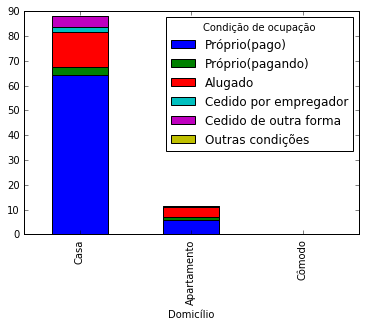

In [22]:
plot = c22.plot(kind="bar", stacked=True)

In [57]:
c3 = pd.crosstab(dados["Condição de ocupação"], dados["Quantidade de Cômodos"]) #Cômodos[quant_comodos] #[Cômodos])
c3

Quantidade de Cômodos,Cômodos
Condição de ocupação,
Próprio(pago),76819
Próprio(pagando),4993
Alugado,20109
Cedido por empregador,2073
Cedido de outra forma,5344
Outras condições,285


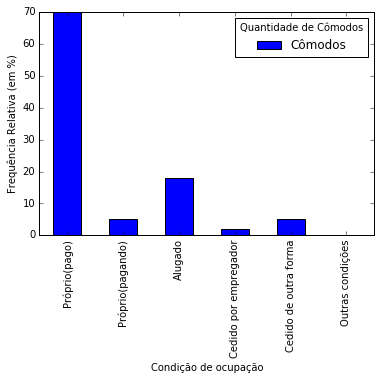

In [52]:
c33 = (c3/c3.sum().sum()*100).round(decimals=0)
plot = c33.plot(kind='bar')
plt.ylabel('Frequência Relativa (em %)')

In [34]:
renda = [dados["Rendimento mensal"]dados2015["Quantidade de Cômodos"][quant_comodos].value_counts()
renda.plot(kind='bar',autopct="%.2f", legend=False)

SyntaxError: invalid syntax (<ipython-input-34-199b1968ec3a>, line 1)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

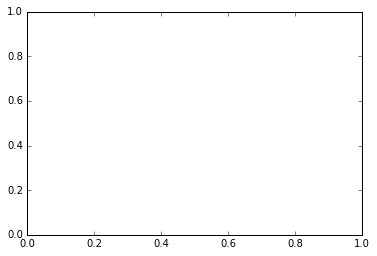

In [46]:
dados.boxplot(column='Quantidade de Cômodos', by="Domicílio")
plt.ylabel("Quantidade de Cômodos")
plt.xlabel("Domicílio")

In [38]:

#n=c1.iloc[2,1]

c4=pd.crosstab(dados["Domicílio"],dados["Material predominante das paredes do domicílio"],normalize=(True))
print('Tabela Cruzada por total GERAL (em %):')
c44=c4*100
c44

Tabela Cruzada por total GERAL (em %):


Material predominante das paredes do domicílio,Alvenaria,Madeira aparelhada,Taipa não revestida,Madeira aproveitada,Palha,Outro material
Domicílio,,,,,,
Casa,80.743092,6.661923,0.32931,0.322013,0.006386,0.143218
Apartamento,11.517656,0.039225,0.00000,0.000000,0.000000,0.006386
Cômodo,0.201600,0.020069,0.00000,0.009122,0.000000,0.000000


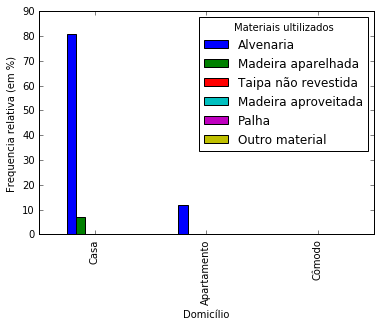

In [39]:
c4 = pd.crosstab(dados["Domicílio"],dados["Material predominante das paredes do domicílio"], rownames=["Domicílio"], colnames=["Materiais ultilizados"])
c4 = (c4/len(dados)*100).round(decimals=0)
plot = c4.plot(kind='bar')
plt.ylabel("Frequencia relativa (em %)")

TypeError: Can't convert 'float' object to str implicitly

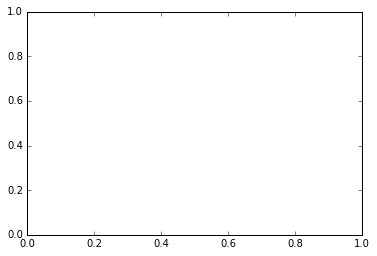

In [47]:
dados.boxplot(column = dados["Quantidade de Cômodos"], by = dados["Material predominante das paredes do domicílio"])

In [59]:
matriz = plt.figure(figsize=(10,10))

plt.subplot(311)
plt.scatter(dados["Rendimento mensal"], dados["Quantidade de Cômodos"], c="g", alpha=0.9)
plt.title("Renda por cômodos")
plt.xlabel("Cômodo")
plt.ylabel("Salario (em reais)")

plt.subplot(312)
plt.scatter(dados["Rendimento mensal"], dados["Quantidade de banheiros"], c="r", alpha=0.5)
plt.title("Renda por banheiros")
plt.xlabel("Banheiros")
plt.ylabel("Salario (em reais)")

plt.subplot(313)
plt.scatter(dados["Quantidade de banheiros"], dados["Quantidade de Cômodos"], c="b", alpha=0.8)
plt.title("Cômodos por banheiros")
plt.xlabel("Banheiros")
plt.ylabel("Cômodos")

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Cômodos'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001901DC6BF28> (for post_execute):


ValueError: could not convert string to float: 'Cômodos'

ValueError: could not convert string to float: 'Cômodos'

In [58]:
renda_norte = dados[dados["Regiões"][Norte]]["Rendimento mensal"]
faixa = arange(0,6000,200)

plot = renda_norte.plot.hist(bins=faixa, normed=1, color="c")
plt.title("Renda dos aposentados")
plt.xlabel("Renda (em Reais)")
plt.ylabel("Frequência relativa")
plt.show()

NameError: name 'Norte' is not defined

___
## Conclusão 

Descreva aqui suas conclusões!